In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
import scipy as sc

In [7]:
df = pd.read_csv('flukaRunsTyped.csv', dtype='float64')

In [8]:
trainRatio = 0.8
# x is the tracklength in each bin
# y is the log of the energy
xfull = df.to_numpy()[:,:500]
yfull = np.log(df.to_numpy()[:,500])
particle_labels = df.to_numpy()[:,501:507]
xtrain, xtest, ytrain, ytest  = train_test_split(
    xfull, yfull, train_size=trainRatio, 
    stratify=particle_labels, shuffle=True, random_state=3)

In [9]:
finalModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 1 (Dense)                   (None, 100)               50100     
                                                                 
 2 (Dense)                   (None, 70)                7070      
                                                                 
 3 (Dense)                   (None, 40)                2840      
                                                                 
 4 (Dense)                   (None, 10)                410       
                                                                 
 Final (Dense)               (None, 1)                 11        
                                                                 
Total params: 60431 (236.06 KB)
Trainable params: 60431 (236.

In [14]:
in_size = xtrain.shape[1]
numEpochs = 60
batchSize = 200

lInput = keras.Input(shape=(in_size,))
l1 = keras.layers.Dense(100, activation='sigmoid',name='1')(lInput)
l2 = keras.layers.Dense(70, activation='sigmoid',name='2')(l1)
l3 = keras.layers.Dense(40, activation='sigmoid',name='3')(l2)
l4 = keras.layers.Dense(10, activation='sigmoid',name='4')(l3)
lFinal = keras.layers.Dense(1, activation=None,name='Final')(l4)
# Full autoencoder
finalModel = keras.Model(lInput, lFinal)
opt = keras.optimizers.legacy.Adam(learning_rate=0.01)
finalModel.compile(optimizer=opt,
                   loss= keras.losses.MeanSquaredError(reduction=keras.losses.Reduction.NONE))
finalModel.fit(xtrain, ytrain.reshape(-1,1), epochs=numEpochs, batch_size=batchSize, 
                 shuffle=True)

Epoch 1/60
240/240 [==============================] - 0s 1ms/step - loss: 6.2896
Epoch 2/60
240/240 [==============================] - 0s 1ms/step - loss: 4.9080
Epoch 3/60
240/240 [==============================] - 0s 1ms/step - loss: 4.9082
Epoch 4/60
240/240 [==============================] - 0s 1ms/step - loss: 4.9075
Epoch 5/60
240/240 [==============================] - 0s 1ms/step - loss: 4.9090
Epoch 6/60
240/240 [==============================] - 0s 1ms/step - loss: 4.9097
Epoch 7/60
240/240 [==============================] - 0s 1ms/step - loss: 4.9096
Epoch 8/60
240/240 [==============================] - 0s 1ms/step - loss: 4.9089
Epoch 9/60
240/240 [==============================] - 0s 1ms/step - loss: 4.9086
Epoch 10/60
240/240 [==============================] - 0s 1ms/step - loss: 4.9102
Epoch 11/60
240/240 [==============================] - 0s 1ms/step - loss: 4.9117
Epoch 12/60
240/240 [==============================] - 0s 1ms/step - loss: 4.9106
Epoch 13/60
240/240 [====

In [15]:
ytestHat = finalModel.predict(xtest)
np.mean((ytestHat.reshape(ytest.shape) - ytest)**2)

375/375 [==============================] - 0s 322us/step


0.006296017525988316

In [16]:
ytrainHat = finalModel.predict(xtrain)
np.mean((ytrain.reshape(-1,1) - ytrainHat.reshape(-1,1))**2)

1500/1500 [==============================] - 0s 301us/step


0.00598179424911021

In [17]:
#Fine tuning, training model with a much lower learning rate
numEpochsTune = 50
batchSizeTune = 2000

#initialize the layers for tuning
lInputTune = keras.Input(shape=(in_size,))
l1Tune = keras.layers.Dense(100, activation='sigmoid',name='Tune1')(lInputTune)
l2Tune = keras.layers.Dense(70, activation='sigmoid',name='Tune2')(l1Tune)
l3Tune = keras.layers.Dense(40, activation='sigmoid',name='Tune3')(l2Tune)
l4Tune = keras.layers.Dense(10, activation='sigmoid',name='Tune4')(l3Tune)
lFinalTune = keras.layers.Dense(1, activation=None,name='TuneFinal')(l4Tune)

    


modelTune = keras.Model(lInputTune, lFinalTune)
modelTune.set_weights(finalModel.get_weights())


opt = keras.optimizers.legacy.Adam(learning_rate=0.0008) #lower learning rate
modelTune.compile(optimizer=opt,
                   loss= keras.losses.MeanSquaredError(reduction=keras.losses.Reduction.NONE))

modelTune.fit(xtrain, ytrain.reshape(-1,1), epochs=numEpochsTune, batch_size=batchSizeTune, 
                 shuffle=True)

Epoch 1/50
24/24 [==============================] - 0s 4ms/step - loss: 0.0063
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 8/50
24/24 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 9/50
24/24 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 10/50
24/24 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 11/50
24/24 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 12/50
24/24 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 13/50
24/24 [==============================

In [33]:
ytestHat = modelTune.predict(xtest)
np.mean((ytestHat.reshape(ytest.shape) - ytest)**2)

375/375 [==============================] - 0s 301us/step


0.005234414511992406

In [19]:
ytrainHat = modelTune.predict(xtrain)
np.mean((ytrain.reshape(-1,1) - ytrainHat.reshape(-1,1))**2)

1500/1500 [==============================] - 0s 299us/step


0.005005668032388414

In [20]:
modelTune.save_weights('./modelTuneWeights')

In [29]:
ltottrain = np.sum(xtrain,axis=1)
ltottest = np.sum(xtest,axis=1)
def funcspl(ltot,a,b):
    return (np.log(ltot) - np.log(a))/ b
popt, pcov = sc.optimize.curve_fit(funcspl,ltottrain,ytrain,p0=[4,1])
ytrainhat = funcspl(ltottrain,*popt)
popt

/var/folders/jj/vqtfjgcn3wz_ckd79n6lm42h0000gn/T/ipykernel_45383/1354279665.py:4: RuntimeWarning: invalid value encountered in log
  return (np.log(ltot) - np.log(a))/ b


array([3.28085619e-05, 1.03593794e+00])

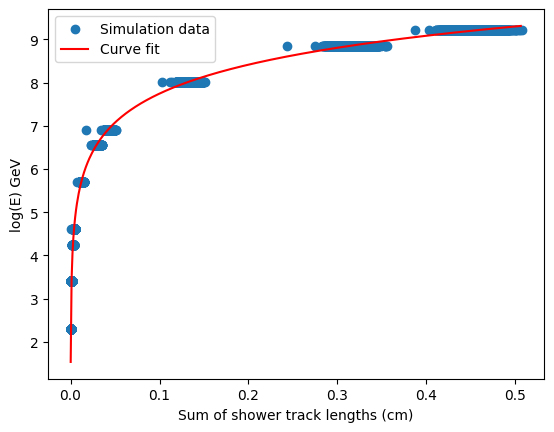

In [30]:
plt.scatter(ltottrain,ytrain,label='Simulation data')
xvals = np.arange(min(ltottrain),max(ltottrain),0.001)
plt.plot(xvals,funcspl(xvals,*popt),'r',label='Curve fit')
plt.xlabel('Sum of shower track lengths (cm)')
plt.ylabel('log(E) GeV')
plt.legend()
plt.show()

In [35]:
ytestHatCurveFit = funcspl(ltottest,*popt)
np.mean((ytest - ytestHatCurveFit)**2)

0.007573076562935456

/var/folders/jj/vqtfjgcn3wz_ckd79n6lm42h0000gn/T/ipykernel_45383/2499756871.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(xvals,funcspl(xvals,*popt),'r',label='Curve fit',color='green',zorder=0)


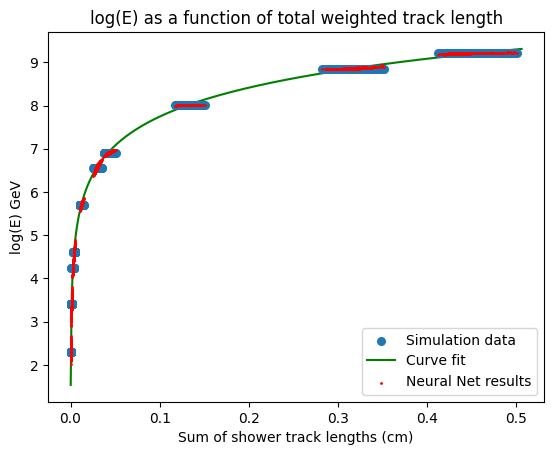

In [128]:
plt.scatter(ltottest,ytest,label='Simulation data',zorder=10,s=30)
xvals = np.arange(min(ltottrain),max(ltottrain),0.001)
plt.plot(xvals,funcspl(xvals,*popt),'r',label='Curve fit',color='green',zorder=0)
ldf = pd.DataFrame(data=np.array([ltottest,ytestHat.reshape(-1,)]).T)
nnvals = ldf.sort_values(by=0).to_numpy()
plt.scatter(nnvals[:,0],nnvals[:,1],label='Neural Net results',color='red',s=1,zorder=20)
plt.xlabel('Sum of shower track lengths (cm)')
plt.ylabel('log(E) GeV')
plt.legend()
plt.title('log(E) as a function of total weighted track length')
plt.show()

In [111]:
from sklearn.metrics import RocCurveDisplay


(507,)

In [129]:
modelTune.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 500)]             0         
                                                                 
 Tune1 (Dense)               (None, 100)               50100     
                                                                 
 Tune2 (Dense)               (None, 70)                7070      
                                                                 
 Tune3 (Dense)               (None, 40)                2840      
                                                                 
 Tune4 (Dense)               (None, 10)                410       
                                                                 
 TuneFinal (Dense)           (None, 1)                 11        
                                                                 
Total params: 60431 (236.06 KB)
Trainable params: 60431 (23

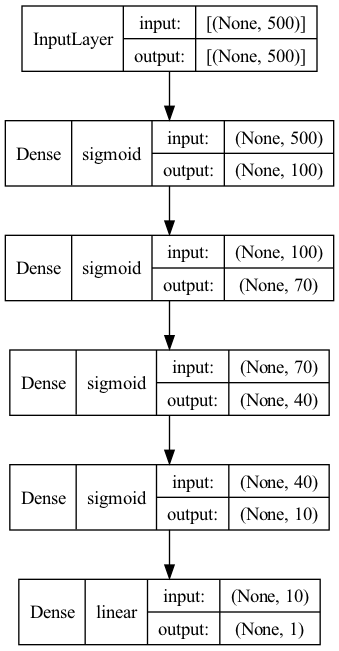

In [131]:
tf.keras.utils.plot_model(modelTune, show_shapes=True, show_layer_names=False, 
                          show_layer_activations=True)